# Project 1


#### `Libraries`


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as syp

#### Solvers


1. Gauss Elimination


In [62]:
def GaussElimination(A:np.array,b:np.array):
    """Function that solves gauss elimination by elementry row operations
    
    Keyword arguments:
    A - np.array(): matrix
    b - np.array(): vector
    Return: A,b
    """
    
    n = len(A)
    for i in range(n-1):
        for j in range(i+1,n):
            factor = float(A[j][i]/A[i][i])
            for k in range(i,n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]

    x = np.zeros(n)
    for i in reversed(range(n)):
        s = 0
        for j in range(i+1,n):
            s += A[i][j] * x[j]
        x[i] = (b[i] - s) / A[i][i]

    return x


#### Plotters


In [111]:
def field_plotter(x,y, phi):
    X, Y = np.meshgrid(x, y)
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, phi, cmap='jet', levels=50)
    plt.colorbar(contour, label='Temperature')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Contour Plot of Computed Temperature Field')
    plt.show()

##### Initial Variables Creation


In [112]:
N = 21
delta = 1.0 / (N - 1)
A = np.zeros((N*N,N*N))
b = np.zeros(N*N)

##### Boundry Conditions and Source Term


In [113]:
phi_bottom = lambda y: 500 * np.exp((-50*(1 + y**2)))

phi_top = lambda y: 100 * (1 - y) + 500* np.exp((-50 * y ** 2))

phi_left = lambda x: 100 * x + 500 * np.exp(( -50 * (1 - x)**2))

phi_right = lambda x: 500 * np.exp(-50 * ((1 - x)**2 + 1))

source_term = lambda x,y:50000 * np.exp(-50 * ((1 - x)**2 + y**2)) * (100 * ((1 - x)**2 + y**2) - 2)

##### Generalized equation


In [102]:
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)

for i in range(N):
    for j in range(N):
        k = i * N + j

        b[k] += source_term(x[i],y[j])

        A[k,k] = -4
        if j > 0:
                A[k, k - 1] = 1
                
        if j < N - 1:
            A[k, k + 1] = 1
        if i > 0:
            A[k, k - N] = 1
        if i < N - 1:
            A[k, k + N] = 1

        if i == 0:  # Bottom boundary (y=0)
            b[k] -= phi_bottom(j)
        if i == N-1:  # Top boundary (y=1)
            b[k] -= phi_top(j)
        if j == 0:  # Left boundary (x=0)
            b[k] -= phi_left(i)
        if j == N-1:  # Right boundary (x=1)
            b[k] -= phi_right(i)


In [107]:
phi = GaussElimination(A,b)

In [109]:
len(phi)

441

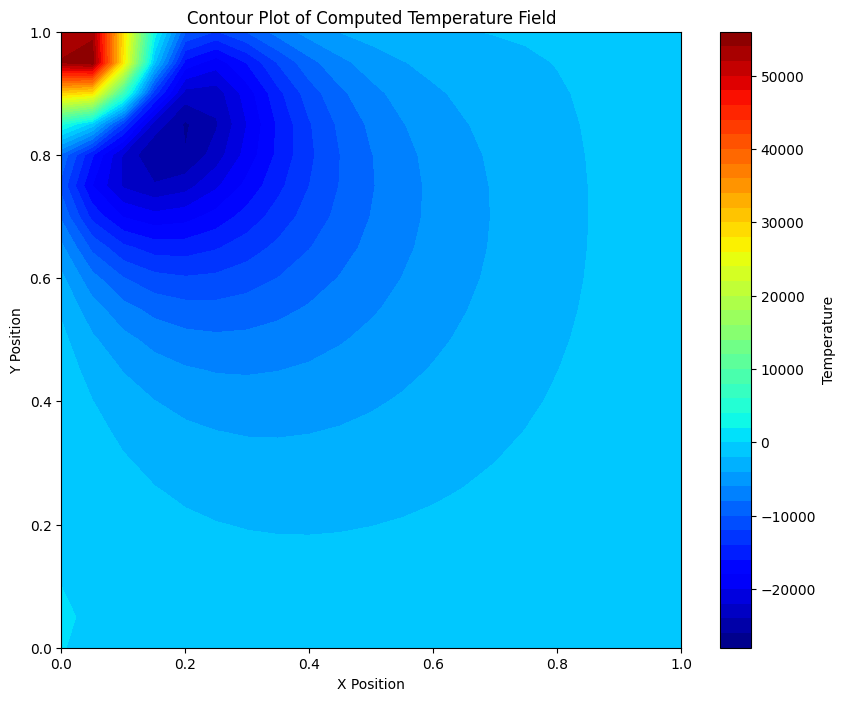

In [114]:
field_plotter(x,y,phi.reshape(N,N))